#import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather['DAY_OF_YEAR'] = df_weather.index+1
df_weather = df_weather.iloc[:,[0,1,2,3,4,5,-1]]

In [2]:
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,DAY_OF_YEAR
0,2019-01-01,9,4,10,4,7,1
1,2019-01-02,8,5,18,7,7,2
2,2019-01-03,6,0,18,0,4,3
3,2019-01-04,5,-1,15,-1,4,4
4,2019-01-05,6,-1,8,-1,4,5
...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,361
361,2019-12-28,11,5,12,7,8,362
362,2019-12-29,9,2,11,3,6,363
363,2019-12-30,12,4,7,5,9,364


#Seaborn  régression linéaire, mais sans accès à l'équation

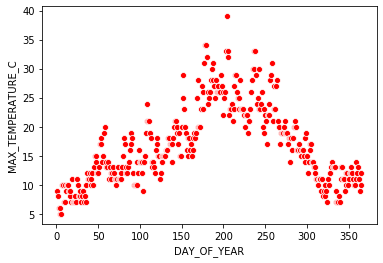

In [4]:
sns.scatterplot(data = df_weather, x = 'DAY_OF_YEAR', y = 'MAX_TEMPERATURE_C', color = 'red')

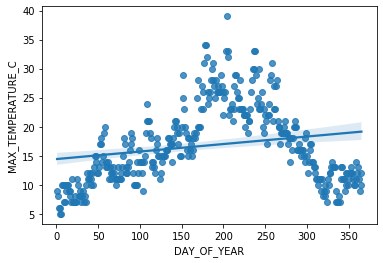

In [5]:
sns.regplot(data = df_weather, x = 'DAY_OF_YEAR', y = 'MAX_TEMPERATURE_C')

#Heatmap de corrélation pour trouver un axe corrélé, sans surprise la tempréature minimale

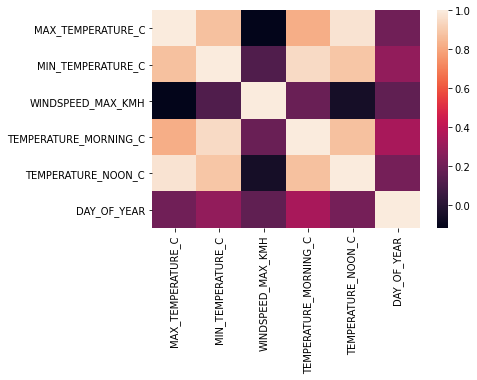

In [ ]:
sns.heatmap(df_weather.corr())

In [ ]:
df_weather.corr().style.background_gradient(cmap='coolwarm')

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,DAY_OF_YEAR
MAX_TEMPERATURE_C,1.000000,0.876892,-0.114510,0.825536,0.975441,0.203357
MIN_TEMPERATURE_C,0.876892,1.000000,0.116357,0.950702,0.888389,0.290540
WINDSPEED_MAX_KMH,-0.114510,0.116357,1.000000,0.189827,-0.053186,0.161394
TEMPERATURE_MORNING_C,0.825536,0.950702,0.189827,1.000000,0.874102,0.349943
TEMPERATURE_NOON_C,0.975441,0.888389,-0.053186,0.874102,1.000000,0.219433
DAY_OF_YEAR,0.203357,0.290540,0.161394,0.349943,0.219433,1.000000


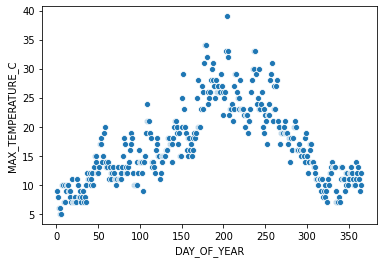

In [ ]:
sns.scatterplot(data = df_weather, x = 'DAY_OF_YEAR', y = 'MAX_TEMPERATURE_C')

## On observe bien la corrélation

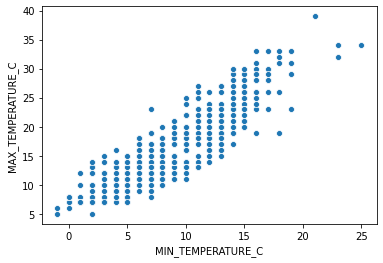

In [ ]:
sns.scatterplot(data = df_weather, x = 'MIN_TEMPERATURE_C', y = 'MAX_TEMPERATURE_C')

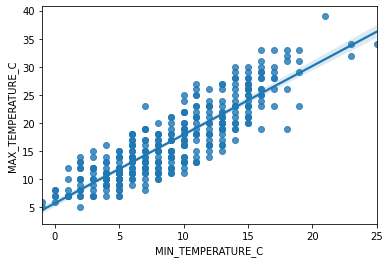

In [ ]:
sns.regplot(data = df_weather, x = 'MIN_TEMPERATURE_C', y = 'MAX_TEMPERATURE_C')

# Régression linéaire via NumPy

In [ ]:
Xaxis = df_weather['MIN_TEMPERATURE_C']
Yaxis = df_weather['MAX_TEMPERATURE_C']

In [ ]:
equation = np.polyfit(x = Xaxis, y = Yaxis, deg =1 )

In [ ]:
equation

array([1.22274205, 5.68903121])

In [ ]:
equation[0]*25 + equation[1]

36.257582469689964

## Régression polynomiale

In [ ]:
equation = np.polyfit(x = Xaxis, y = Yaxis, deg =3 )

In [ ]:
equation

array([-1.87273494e-03,  7.84155053e-02,  3.37690951e-01,  8.08591587e+00])

## Résolution avec la fonction dédiée numpy

In [ ]:
equation = np.polyfit(x = Xaxis, y = Yaxis, deg =1 )

### La fonction fonctionne sur les listes et les arrays et les séries

In [ ]:
np.poly1d(equation)([0, 10, 25])

array([ 5.68903121, 17.91645172, 36.25758247])

In [ ]:
np.poly1d(equation)(df_weather['MIN_TEMPERATURE_C'])

array([10.57999942, 11.80274147,  5.68903121,  4.46628916,  4.46628916,
        8.13451531, 10.57999942, 13.02548352, 11.80274147,  6.91177326,
        8.13451531,  9.35725737, 14.24822557, 15.47096762, 10.57999942,
        6.91177326, 11.80274147,  6.91177326, 13.02548352, 10.57999942,
        5.68903121, 11.80274147,  9.35725737,  5.68903121, 15.47096762,
       15.47096762, 14.24822557, 10.57999942, 11.80274147,  9.35725737,
        8.13451531, 13.02548352,  8.13451531,  5.68903121, 11.80274147,
       10.57999942, 17.91645172, 16.69370967, 15.47096762, 16.69370967,
       15.47096762, 11.80274147,  9.35725737,  8.13451531,  8.13451531,
       13.02548352, 13.02548352, 14.24822557, 11.80274147, 11.80274147,
       10.57999942, 13.02548352, 14.24822557, 15.47096762, 11.80274147,
       11.80274147, 14.24822557, 16.69370967, 16.69370967, 14.24822557,
       13.02548352, 16.69370967, 14.24822557, 14.24822557, 16.69370967,
       13.02548352, 11.80274147, 15.47096762, 15.47096762, 11.80

## Ajout d'une colonne avec les prédictions

In [ ]:
df_weather['coucou'] = 'coucou'

In [ ]:
df_weather['max_predict'] = np.poly1d(equation)(df_weather['MIN_TEMPERATURE_C'])

In [ ]:
df_weather[['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'max_predict']]

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,max_predict
0,9,4,10.579999
1,8,5,11.802741
2,6,0,5.689031
3,5,-1,4.466289
4,6,-1,4.466289
...,...,...,...
360,13,10,17.916452
361,11,5,11.802741
362,9,2,8.134515
363,12,4,10.579999


## Affichage de la régression en rouge

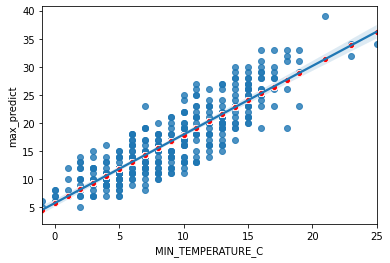

In [ ]:
sns.regplot(data = df_weather, x = 'MIN_TEMPERATURE_C', y = 'MAX_TEMPERATURE_C')
sns.scatterplot(data = df_weather, x = 'MIN_TEMPERATURE_C', y = 'max_predict', color = 'red')

## Affichage de cette même régression mais avec les températures en abscisse, elle ne parait plus du tout linéaire, et pourtant elle l'est !

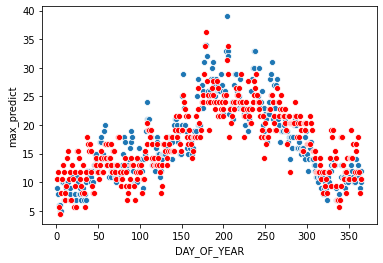

In [ ]:
sns.scatterplot(data = df_weather,x = 'DAY_OF_YEAR', y = 'MAX_TEMPERATURE_C' )
sns.scatterplot(data = df_weather,x = 'DAY_OF_YEAR', y = 'max_predict', color = 'red' )